In [1]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [14]:
data = pd.read_csv('./final/시계열.csv', index_col=0)

In [16]:
data

,qty,1kg price,temp,temp_sc,qty_sc
2006-04-04,978.3,4948.71,12.02,-0.853048,-0.652525
2006-04-05,4600.7,4447.32,11.90,-0.876107,0.042461
2006-04-06,3842.2,4620.74,12.12,-0.833833,-0.103063
2006-04-07,4777.3,4060.83,12.18,-0.822304,0.076343
2006-04-08,4773.5,4547.00,12.17,-0.824225,0.075614
...,...,...,...,...,...
2021-04-04,561.4,4642.59,13.30,-0.607090,-0.732510
2021-04-05,421.1,5653.34,13.32,-0.603247,-0.759428
2021-04-06,290.7,7392.06,13.35,-0.597483,-0.784446
2021-04-07,399.9,7735.17,13.42,-0.584032,-0.763496


In [18]:
mydata = data[["qty_sc", '1kg price','temp_sc']]

In [19]:
mydata

,qty_sc,1kg price,temp_sc
2006-04-04,-0.652525,4948.71,-0.853048
2006-04-05,0.042461,4447.32,-0.876107
2006-04-06,-0.103063,4620.74,-0.833833
2006-04-07,0.076343,4060.83,-0.822304
2006-04-08,0.075614,4547.00,-0.824225
...,...,...,...
2021-04-04,-0.732510,4642.59,-0.607090
2021-04-05,-0.759428,5653.34,-0.603247
2021-04-06,-0.784446,7392.06,-0.597483
2021-04-07,-0.763496,7735.17,-0.584032


In [20]:
y = mydata['1kg price']
y_1diff = mydata['1kg price'].diff().dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

원 데이터 ADF Statistic: -6.292
원 데이터 p-value: 0.000
1차 차분 ADF Statistic: -22.637
1차 차분 p-value: 0.000


In [22]:
y = mydata['qty_sc']
y_1diff = mydata['qty_sc'].diff().dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

원 데이터 ADF Statistic: -5.383
원 데이터 p-value: 0.000
1차 차분 ADF Statistic: -13.997
1차 차분 p-value: 0.000


In [23]:
y = mydata['temp_sc']
y_1diff = mydata['qty_sc'].diff().dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

원 데이터 ADF Statistic: -8.722
원 데이터 p-value: 0.000
1차 차분 ADF Statistic: -13.997
1차 차분 p-value: 0.000


In [24]:
train = mydata.iloc[:-10,:]
test = mydata.iloc[-10:,:]

In [37]:
forecasting_model = VAR(train)
results_aic = []
for p in range(1,20):
    results = forecasting_model.fit(p)
    results_aic.append(results.aic)

C:\Users\choi yeseul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [28]:
import seaborn as sns

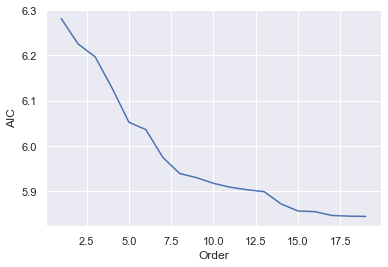

In [38]:
sns.set()
plt.plot(list(np.arange(1,20,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [40]:
np.sqrt(0.008)

0.08944271909999159